BÀI THỰC HÀNH SỐ 3

I. Mục đích:
Xây dựng classifier và biệt thức dựa trên luật Bayes.

II. Báo cáo:
Mỗi nhóm sẽ làm báo kết quả riêng, nộp kèm file source chương trình.

III. Nội dung:

1. Xây dựng bộ phân lớp và trực quan hóa biên phân lớp đối với tập dữ liệu iris:
- Tập dữ liệu có 3 lớp với các nhãn là Setosa, Versicolor, và Virginica.
- Sử dụng 2 đặc trưng: sepal length và sepal width.

• Load dữ liệu:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

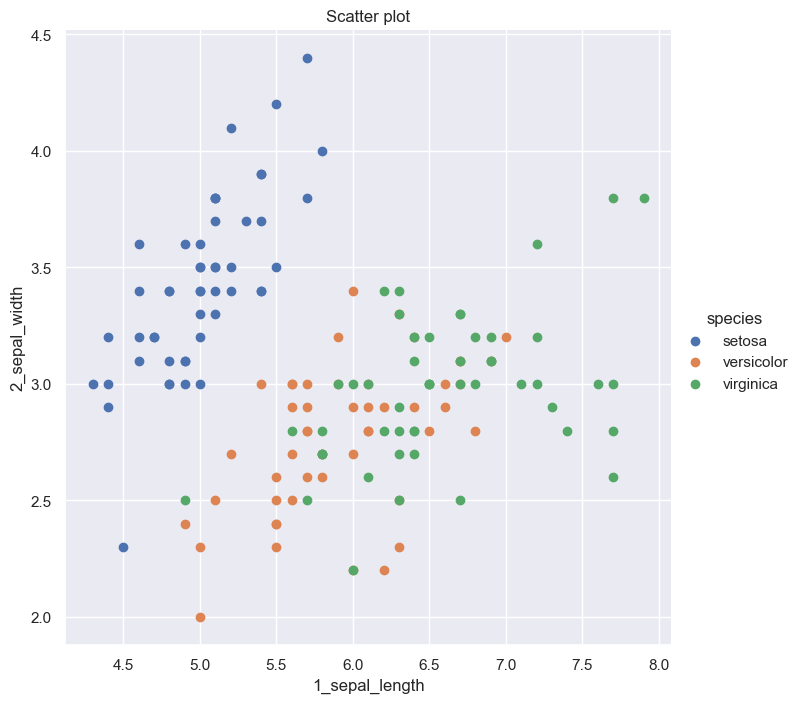

In [2]:
#%matplotlib inline
sns.set()
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns =
{'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width',
'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species",
height=7) .map(plt.scatter,"1_sepal_length",
"2_sepal_width", ) .add_legend()
plt.title('Scatter plot')
plt.show()

• Xây dựng hàm đánh giá:

In [3]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] ) * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) * pi_list[p])
    scores_list.append(score)
    return np.argmax(scores_list)
    #--------------------------------------------------
def predict_Bayes_class(X,mu_list,sigma_list):
#Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
        
    return np.argmax(scores_list)

• Plot biên phân lớp

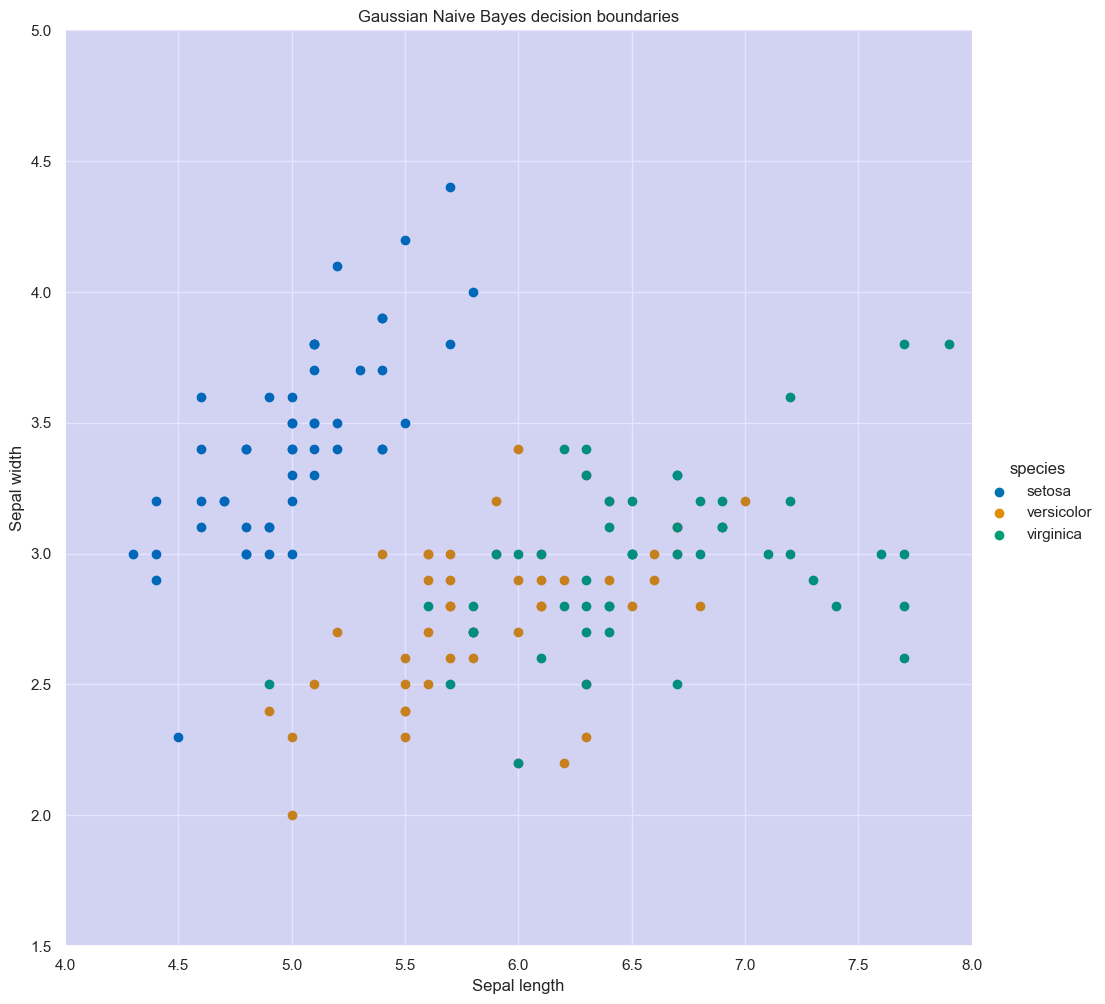

In [5]:
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1),
mu_list, std_list, pi_list)
for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
'''
zz1 = np.array( [predict_Bayes_class( np.array([xx,yy]).reshape(-1,1),
mu_list, std_list)
for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
'''
#Reshaping the predicted class into the meshgrid shape

Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

2. Cho 2 tập dữ liệu class A (classA.mat) và class B (classB.mat). Xây dựng bộ
classifier với 2 đặc trưng. Giả sử hai tập dữ liệu có dạng phân bố Gauss có cùng
ma trận hiệp phương sai là SIGMA=[1 0; 0 1].

Load data:
- Load 2 file tương ứng cho 2 class là: classA.mat và classB.mat.
- Plot dữ liệu.
- Xác định số mẫu của mỗi class.
- Phân chia tập dữ liệu thành 2 tập con: tập huấn luyện (60%) và tập kiểm thử
(40%).

• Huấn luyện
- Tính mean tương ứng cho từng class.
- Xây dựng biệt thức (discriminant function). Tham khảo bài giảng.
• Đánh giá
- Đánh giá trên tập dữ liệu test. Tính độ chính xác cho từng tập và xây dựng
confusion matrix.
Class A Class B
Class A
Class B
- Plot dữ liệu testing của 2 lớp và đường biên phân lớp trên cùng một hình.
Tương tự, sinh viên thực nghiệm với các cách phân chia tập dữ liệu khác nhau.
Cụ thể, tập dữ liệu huấn luyện là 70%, 75%, và 80%

In [17]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data from .mat files
file_A = "C:/Users/hung0/Documents/IUH/NhanDangMau/classA.mat"
file_B = "C:/Users/hung0/Documents/IUH/NhanDangMau/classB.mat"

data_A = scipy.io.loadmat(file_A)
data_B = scipy.io.loadmat(file_B)

# Extract variables (assuming data is stored under some key)
key_A = list(data_A.keys())[-1]  # Get the last key (data matrix)
key_B = list(data_B.keys())[-1]

classA = data_A[key_A]
classB = data_B[key_B]

# Check dimensions and first few data points
classA.shape, classB.shape


((300, 2), (195, 2))

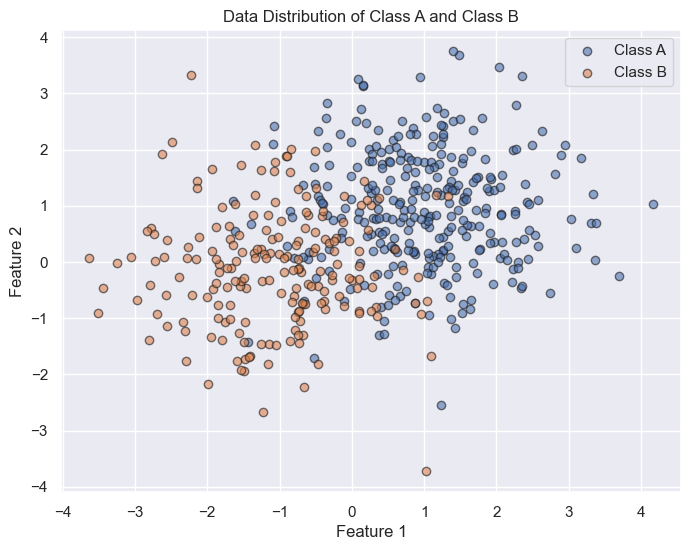

In [11]:
# Plot data distribution
plt.figure(figsize=(8, 6))
plt.scatter(classA[:, 0], classA[:, 1], label="Class A", alpha=0.6, edgecolors='k')
plt.scatter(classB[:, 0], classB[:, 1], label="Class B", alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Distribution of Class A and Class B")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Labels for classes
labels_A = np.zeros(classA.shape[0])  # Class A labeled as 0
labels_B = np.ones(classB.shape[0])   # Class B labeled as 1

# Combine data
X = np.vstack((classA, classB))
y = np.hstack((labels_A, labels_B))

# Split into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Check sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((297, 2), (198, 2), (297,), (198,))

In [13]:
# Compute mean vectors for each class
mean_A = np.mean(X_train[y_train == 0], axis=0)
mean_B = np.mean(X_train[y_train == 1], axis=0)

# Given covariance matrix (identity matrix)
SIGMA = np.array([[1, 0], [0, 1]])
SIGMA_inv = np.linalg.inv(SIGMA)  # Since it's identity, it's also the inverse

# Compute linear discriminant function coefficients
w = np.dot(SIGMA_inv, (mean_B - mean_A))
b = -0.5 * np.dot(mean_B, np.dot(SIGMA_inv, mean_B)) + 0.5 * np.dot(mean_A, np.dot(SIGMA_inv, mean_A))

# Display results
w, b


(array([-2.11732499, -1.09061386]), 0.3495774805633145)

In [14]:
# Compute predictions for test set
y_pred = (np.dot(X_test, w) + b) > 0  # If g(x) > 0, predict class B (1), else class A (0)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(0.898989898989899,
 array([[107,  13],
        [  7,  71]], dtype=int64))

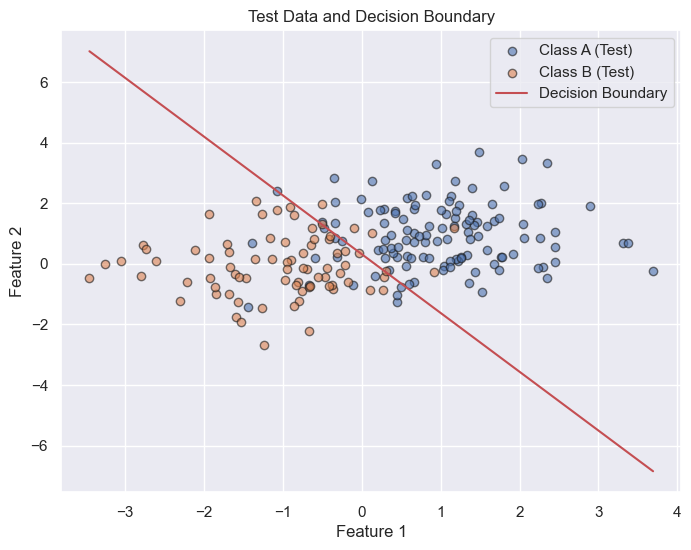

In [15]:
# Plot test data with decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label="Class A (Test)", alpha=0.6, edgecolors='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label="Class B (Test)", alpha=0.6, edgecolors='k')

# Decision boundary: w1*x1 + w2*x2 + b = 0  -->  x2 = (-w1*x1 - b) / w2
x_vals = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_vals = (-w[0] * x_vals - b) / w[1]
plt.plot(x_vals, y_vals, 'r-', label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Test Data and Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Function to train and evaluate with different train-test splits
def evaluate_with_split(train_ratio):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_ratio, stratify=y, random_state=42)
    
    # Compute means
    mean_A = np.mean(X_train[y_train == 0], axis=0)
    mean_B = np.mean(X_train[y_train == 1], axis=0)
    
    # Compute discriminant function parameters
    w = np.dot(SIGMA_inv, (mean_B - mean_A))
    b = -0.5 * np.dot(mean_B, np.dot(SIGMA_inv, mean_B)) + 0.5 * np.dot(mean_A, np.dot(SIGMA_inv, mean_A))
    
    # Make predictions
    y_pred = (np.dot(X_test, w) + b) > 0
    accuracy = accuracy_score(y_test, y_pred)
    
    return train_ratio, accuracy

# Evaluate different training set sizes
results = [evaluate_with_split(ratio) for ratio in [0.7, 0.75, 0.8]]

# Display results
import pandas as pd

df_results = pd.DataFrame(results, columns=["Train Ratio", "Accuracy"])
df_results


,Train Ratio,Accuracy
0,0.70,0.885906
1,0.75,0.887097
2,0.80,0.878788


3. Xây dựng bộ classifier với 2 lớp, 2 đặc trưng. Giả sử tập dữ liệu có dạng phân bố
Gauss. Tập dữ liệu huấn luyện là class1_train.mat và class2_train.mat. Tập dữ liệu
đánh giá là class1_test.mat và class2_test.mat

• Load data:
- Load 2 file tương ứng cho 2 class là: class1_train.mat và class2_train.mat. Sử
dụng lệnh:
- Plot dữ liệu.
- Xây dựng classifier:
- Tính mean, và covariance tương ứng cho từng class.
- Xây dựng biệt thức (discriminant function).
- Đánh giá trên tập dữ liệu test, class1_test.mat và class2_test.mat. Tính độ
chính xác cho từng tập và xây dựng confusion matrix.

Class1 Class2
Class1
Class2
- Plot dữ liệu testing của 2 lớp và đường biên phân lớp trên cùng một hình.

In [20]:
# Load training and testing data
file_train1 = "C:/Users/hung0/Documents/IUH/NhanDangMau/class1_train.mat"
file_train2 = "C:/Users/hung0/Documents/IUH/NhanDangMau/class2_train.mat"
file_test1 = "C:/Users/hung0/Documents/IUH/NhanDangMau/class1_test.mat"
file_test2 = "C:/Users/hung0/Documents/IUH/NhanDangMau/class2_test.mat"

data_train1 = scipy.io.loadmat(file_train1)
data_train2 = scipy.io.loadmat(file_train2)
data_test1 = scipy.io.loadmat(file_test1)
data_test2 = scipy.io.loadmat(file_test2)

# Extract data assuming it's stored under the last key
key_train1 = list(data_train1.keys())[-1]
key_train2 = list(data_train2.keys())[-1]
key_test1 = list(data_test1.keys())[-1]
key_test2 = list(data_test2.keys())[-1]

class1_train = data_train1[key_train1]
class2_train = data_train2[key_train2]
class1_test = data_test1[key_test1]
class2_test = data_test2[key_test2]

# Check dimensions
class1_train.shape, class2_train.shape, class1_test.shape, class2_test.shape


((100, 2), (100, 2), (100, 2), (100, 2))

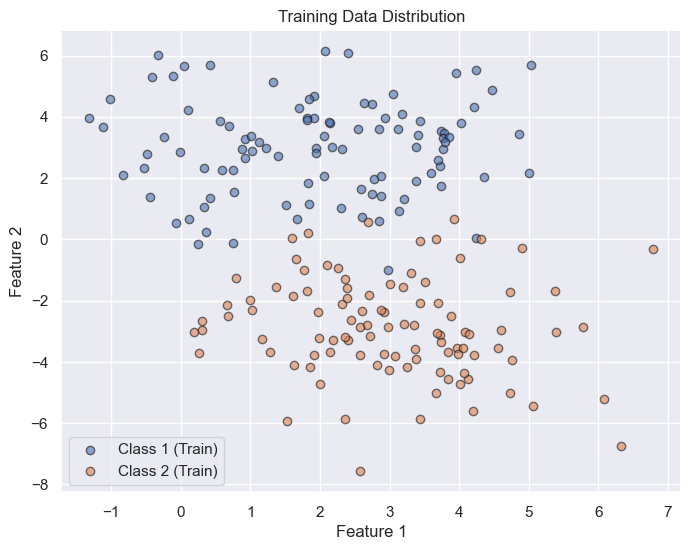

In [21]:
# Plot training data distribution
plt.figure(figsize=(8, 6))
plt.scatter(class1_train[:, 0], class1_train[:, 1], label="Class 1 (Train)", alpha=0.6, edgecolors='k')
plt.scatter(class2_train[:, 0], class2_train[:, 1], label="Class 2 (Train)", alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Data Distribution")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Compute mean and covariance for each class
mean_1 = np.mean(class1_train, axis=0)
mean_2 = np.mean(class2_train, axis=0)

cov_1 = np.cov(class1_train, rowvar=False)
cov_2 = np.cov(class2_train, rowvar=False)

# Display results
(mean_1, mean_2), (cov_1, cov_2)


((array([1.97909027, 2.97947776]), array([ 3.01056198, -2.87167377])),
 (array([[2.4802316 , 0.08304637],
         [0.08304637, 2.44708868]]),
  array([[ 1.89496114, -0.31990908],
         [-0.31990908,  2.64843169]])))

In [23]:
# Compute inverse and determinant of covariance matrices
cov_1_inv = np.linalg.inv(cov_1)
cov_2_inv = np.linalg.inv(cov_2)
det_cov_1 = np.linalg.det(cov_1)
det_cov_2 = np.linalg.det(cov_2)

# Define discriminant function (Quadratic Discriminant Analysis)
def discriminant_function(x, mean, cov_inv, det_cov, prior=0.5):
    return -0.5 * np.dot(np.dot((x - mean), cov_inv), (x - mean).T) - 0.5 * np.log(det_cov) + np.log(prior)

# Compute predictions for test set
y_test_true = np.array([0] * len(class1_test) + [1] * len(class2_test))
X_test = np.vstack((class1_test, class2_test))

# Compute scores for each class
g1 = np.array([discriminant_function(x, mean_1, cov_1_inv, det_cov_1) for x in X_test])
g2 = np.array([discriminant_function(x, mean_2, cov_2_inv, det_cov_2) for x in X_test])

# Predict class labels
y_test_pred = (g2 > g1).astype(int)

# Compute accuracy and confusion matrix
accuracy = accuracy_score(y_test_true, y_test_pred)
conf_matrix = confusion_matrix(y_test_true, y_test_pred)

accuracy, conf_matrix


(0.98,
 array([[98,  2],
        [ 2, 98]], dtype=int64))

C:\Users\hung0\AppData\Local\Temp\ipykernel_12328\32572731.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='r', linewidths=2, label="Decision Boundary")


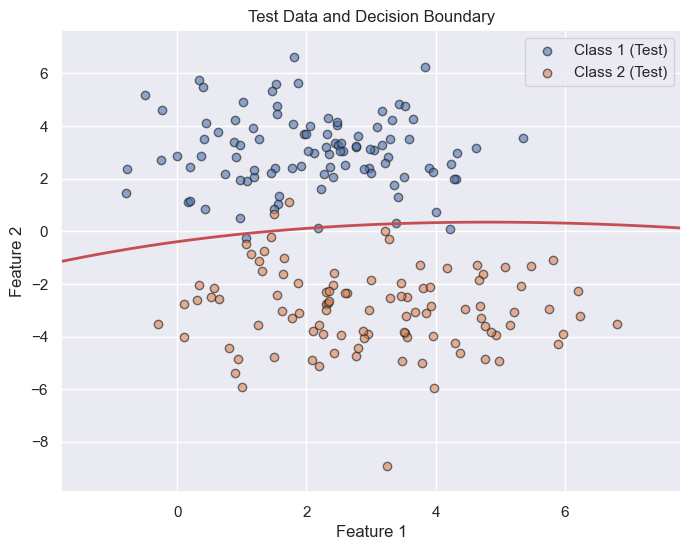

In [24]:
# Plot test data with decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot test data
plt.scatter(class1_test[:, 0], class1_test[:, 1], label="Class 1 (Test)", alpha=0.6, edgecolors='k')
plt.scatter(class2_test[:, 0], class2_test[:, 1], label="Class 2 (Test)", alpha=0.6, edgecolors='k')

# Create grid for decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Compute decision boundary
Z = np.array([discriminant_function(np.array([x, y]), mean_1, cov_1_inv, det_cov_1) - 
              discriminant_function(np.array([x, y]), mean_2, cov_2_inv, det_cov_2) 
              for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='r', linewidths=2, label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Test Data and Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()
